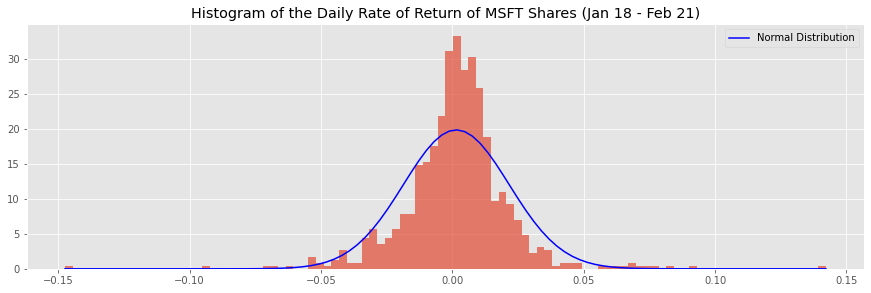

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use('ggplot')

MarketData = pd.read_csv('MarketData.csv')
MarketData.drop('AAPL US Equity', inplace = True, axis = 1)
MarketData['Daily Rate of Return'] = MarketData['MSFT US Equity'].pct_change()
RecentData = MarketData.iloc[2658:]
plt.figure(figsize = (15, 4.5))
plt.hist(RecentData['Daily Rate of Return'], density = True, bins = 100, alpha = 0.7)

RecentMean = np.mean(RecentData['Daily Rate of Return'])
RecentSD = np.std(RecentData['Daily Rate of Return'])
RecentSize = np.linspace(np.min(RecentData['Daily Rate of Return']), np.max(RecentData['Daily Rate of Return']), 100)
plt.plot(RecentSize, norm.pdf(RecentSize, RecentMean, RecentSD), 'b', label = 'Normal Distribution')
plt.legend()
plt.title("Histogram of the Daily Rate of Return of MSFT Shares (Jan 18 - Feb 21)")
plt.show()

The distribution of the histogram exhibits slight fat tails. When a normal distribution is added it fits reasonably well. There is no significant skew and a positive kurtosis that mirrors the fat tails.

In [3]:
Mean = np.mean(MarketData['Daily Rate of Return'])
SD = np.std(MarketData['Daily Rate of Return'])

CrashData = MarketData.iloc[244:580]
CrashMean = np.mean(CrashData['Daily Rate of Return'])
CrashSD = np.std(CrashData['Daily Rate of Return'])

CoronaData = MarketData.iloc[3182:3329]
CoronaMean = np.mean(CoronaData['Daily Rate of Return'])
CoronaSD = np.std(CoronaData['Daily Rate of Return'])

WeeklyData = MarketData.iloc[1::5]
WeeklyMean = np.mean(WeeklyData['Daily Rate of Return'])
WeeklySD = np.std(WeeklyData['Daily Rate of Return'])

FortnightlyData = MarketData.iloc[1::10]
FortnightlyMean = np.mean(FortnightlyData['Daily Rate of Return'])
FortnightlySD = np.std(FortnightlyData['Daily Rate of Return'])

MonthlyData = MarketData.iloc[1::21]
MonthlyMean = np.mean(MonthlyData['Daily Rate of Return'])
MonthlySD = np.std(MonthlyData['Daily Rate of Return'])

In [187]:
print("Daily Rate of Return (2018-2021):  Mean:",round(RecentMean, 6),"Standard Deviation:",round(RecentSD, 6),
      "\nDaily Rate of Return (2007-2021):  Mean:",round(Mean, 6),"Standard Deviation:",round(SD, 6),
      "\nDaily Rate of Return (2008-2009):  Mean:",round(CrashMean, 6),"Standard Deviation:",round(CrashSD, 6),
      "\nDaily Rate of Return (2020):       Mean:",round(CoronaMean, 6),"Standard Deviation:",round(CoronaSD, 6),
      "\n"
      "\nWeekly Rate of Return (2007-2021):      Mean:",round(WeeklyMean, 6),"Standard Deviation:",round(WeeklySD, 6),
      "\nFortnightly Rate of Return (2007-2021): Mean:",round(FortnightlyMean, 6),"Standard Deviation:",round(FortnightlySD, 6),
      "\nMontly Rate of Return (2007-2021):      Mean:",round(MonthlyMean, 6)," Standard Deviation:",round(MonthlySD, 6))

Daily Rate of Return (2018-2021):  Mean: 0.001516 Standard Deviation: 0.020111 
Daily Rate of Return (2007-2021):  Mean: 0.000764 Standard Deviation: 0.018104 
Daily Rate of Return (2008-2009):  Mean: 0.000193 Standard Deviation: 0.031016 
Daily Rate of Return (2020):       Mean: 0.002453 Standard Deviation: 0.032743 

Weekly Rate of Return (2007-2021):      Mean: -0.000386 Standard Deviation: 0.019138 
Fortnightly Rate of Return (2007-2021): Mean: -0.000419 Standard Deviation: 0.019214 
Montly Rate of Return (2007-2021):      Mean: 0.002999  Standard Deviation: 0.020683


Microsoft shares were weakest during the 2008 crash, with a mean of 0.02%, compared to a longer term average of 0.08%. The mean was still positive overall though as the economy recovered during the second half of 2009.

During the first wave of coronavirus, Microsoft shares did well; the average rate of return was 0.2% - more than double the long term average. I attribute this to the large increase of people working from home. As Microsoft is a tech company, this caused a demand for Microsoft products, driving the price up.

During the 2008 crash and the first lockdown, standard deviation was higher (Around 3.2% - double the longer term standard deviation of 1.8%). This makes sense as they were uncertain times and there must have been an element of panic with traders.

The weekly and fortnightly means are the lowest - with means of -0.04% when rounded. This data maps roughly to the end of the week. It suggests that the rate of returns are slightly lower than average at the end of a trading week. This could be due to traders selling shares before the weekend, perhaps to avoid the possibility of bad weekend news that would lower stock prices.

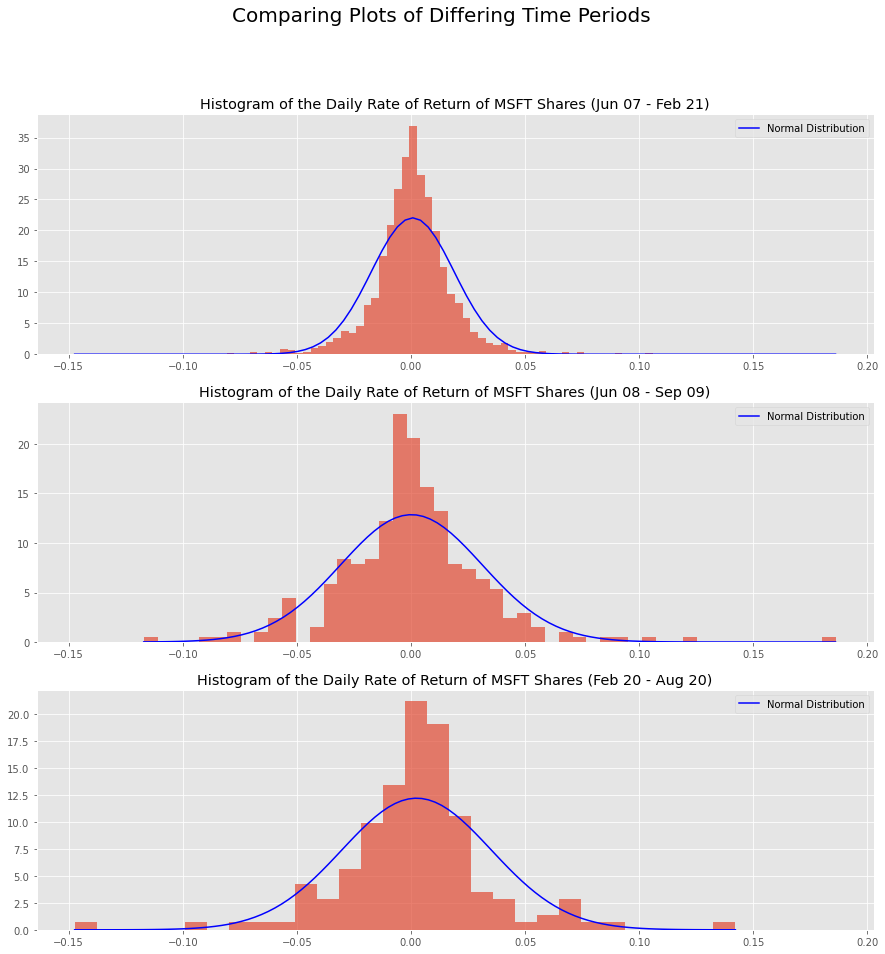

In [4]:
fig, ax = plt.subplots(3, 1, figsize = (15, 15))
fig.suptitle("Comparing Plots of Differing Time Periods", fontsize = 20)

ax1 = plt.subplot(311)
plt.hist(MarketData['Daily Rate of Return'], density = True, bins = 100, alpha = 0.7)
Size = np.linspace(np.min(MarketData['Daily Rate of Return']), np.max(MarketData['Daily Rate of Return']), 100)
plt.plot(Size, norm.pdf(Size, Mean, SD), 'b', label = 'Normal Distribution')
plt.legend()
plt.title("Histogram of the Daily Rate of Return of MSFT Shares (Jun 07 - Feb 21)")

ax2 = plt.subplot(312, sharex = ax1)
plt.hist(CrashData['Daily Rate of Return'], density = True, bins = 50, alpha = 0.7)
CrashSize = np.linspace(np.min(CrashData['Daily Rate of Return']), np.max(CrashData['Daily Rate of Return']), 100)
plt.plot(CrashSize, norm.pdf(CrashSize, CrashMean, CrashSD), 'b', label = 'Normal Distribution')
plt.legend()
plt.title("Histogram of the Daily Rate of Return of MSFT Shares (Jun 08 - Sep 09)")

plt.subplot(313, sharex = ax1)
plt.hist(CoronaData['Daily Rate of Return'], density = True, bins = 30, alpha = 0.7)
CoronaSize = np.linspace(np.min(CoronaData['Daily Rate of Return']), np.max(CoronaData['Daily Rate of Return']), 100)
plt.plot(CoronaSize, norm.pdf(CoronaSize, CoronaMean, CoronaSD), 'b', label = 'Normal Distribution')
plt.legend()
plt.title("Histogram of the Daily Rate of Return of MSFT Shares (Feb 20 - Aug 20)")

plt.show()

The normal distributions of the rate of return during the financial crash in 2008 and of the first wave of covid were wider than usual. This shows that the stock had a wide range of prices during those periods; they were highly volatile. These are examples of positive excess kurtosis - known as leptokurtosis.

The daily rate of return distribution from 2007 to 2021 provides the most representative distribution. It can be viewed as an "average" of stock price returns and is what is expected when larger sample sizes are taken. The histogram does exhibit fat tails which is due to the volatility of stock prices and can be thought of as representing the risk in the stock market.